In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'
import random
from sklearn import svm, datasets, neighbors, linear_model, cross_validation, metrics, preprocessing
import cPickle as pickle

## This tutorial will cover supervised learning, including regression and classification. Topics include
* Linear regression
* Ridge regression
* Lasso
* Logistic regression
* Softmax regression
* Neural networks
* Convoluational neural net

##   Simple linear regression example:

<img src="cricketgreen.gif" alt="Smiley face" height="120" width="126" align="left">
<h2>Cricket:  temperature (F) vs.  frequency of chips</h2>
Because crickets are cold-blooded, the rate of their metabolism and physiological processes depend on temperature. It has been observed that the temperature can have a big impact on their behavior. One such example is the frequency of chirps.  Crickets sing when the temperature is not too high (>100 F) or too low (<60 F), and the frequency of chirps is influnced by the temperature. 

In [4]:
cricket_data = pd.read_csv('cricket_chirps.csv')

In [5]:
cricket_data

,Chirps/Second,Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [11]:
cricket_x = cricket_data['Temperature'].values.reshape(-1,1)
cricket_y = cricket_data['Chirps/Second'].values

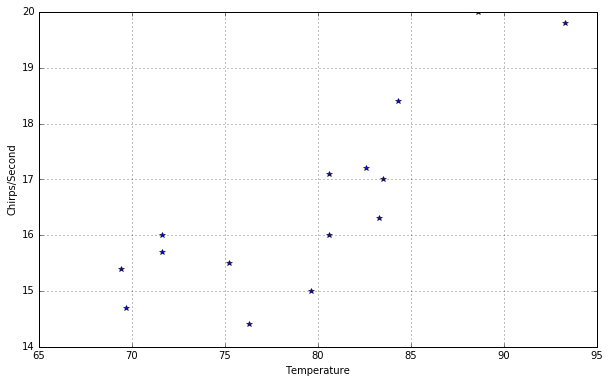

In [12]:
plt.plot(cricket_x,cricket_y,'*')
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Chirps/Second')

## Simple linear regression:    $y \sim \beta_0 + \beta_1 \times x$

In [14]:
regr = linear_model.LinearRegression()
regr.fit(cricket_x, cricket_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
b, a = regr.coef_, regr.intercept_
print(regr.coef_, regr.intercept_)

(array([ 0.20299973]), 0.45931464523595977)


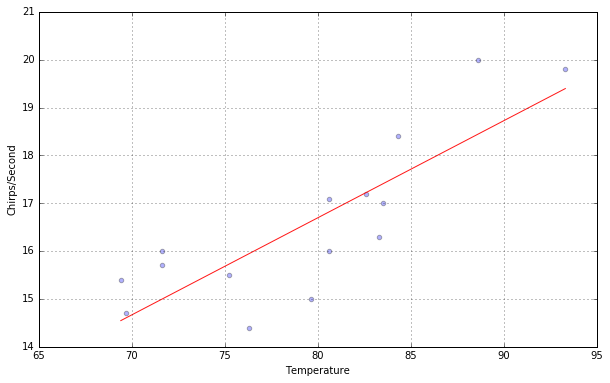

In [20]:
# plot predicted values by the model
X2 = np.linspace(cricket_x.min(), cricket_x.max(), 100)
Y_hat = X2 * b + a
plt.scatter(cricket_x, cricket_y, alpha=0.3) # Plot the raw data
plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Chirps/Second')

## Diabetes dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

## Multiple Linear Regression 

in it’s simplest form, fits a linear model to the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

Linear models: $$y = X\beta + \epsilon$$

        $X$: data
        $y$: target variable
        $\beta$: Coefficients
        $\epsilon$: Observation noise

In [23]:
# split the data into traing and testing
diabetes = datasets.load_diabetes()
print diabetes.data.shape
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

(442, 10)


In [24]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print regr.coef_
print regr.intercept_

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
152.764306916


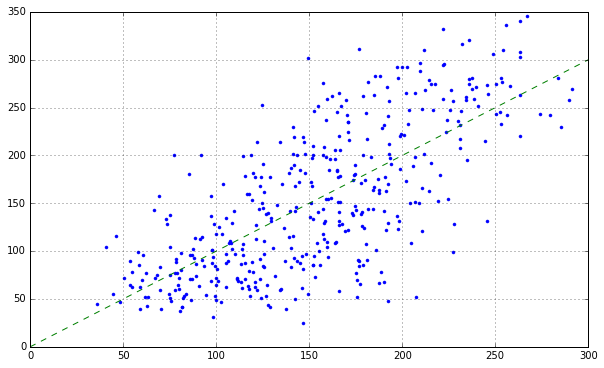

In [26]:
plt.plot(regr.predict(diabetes_X_train), diabetes_y_train,'.')
plt.plot([0,300],[0,300],'--g')
plt.grid()

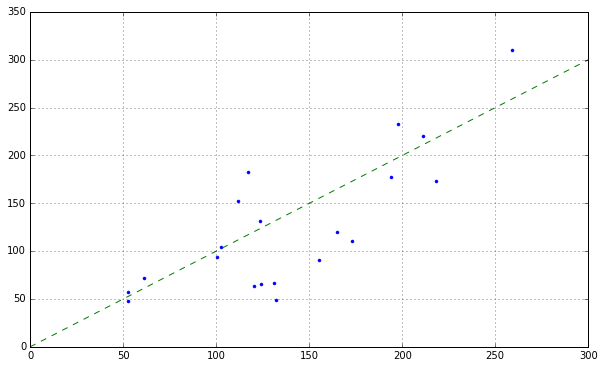

In [27]:
plt.plot(regr.predict(diabetes_X_test), diabetes_y_test,'.')
plt.plot([0,300],[0,300],'--g')
plt.grid()

In [28]:
# The mean square error
print np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and Y.
regr.score(diabetes_X_test, diabetes_y_test) 

2004.56760269


0.58507530226905724

## Ridge regression

- Regularize L2 norm of coeficents.  Shrink the coeficents toward zero. 

- Model: $$ y = X \beta + \alpha \|\beta\|_2^2 + \epsilon$$

* $\alpha$ is the regularization parameter

0.0001 0.585111068388
0.000398107170553 0.585207301544
0.00158489319246 0.58546775407
0.0063095734448 0.58555120365
0.0251188643151 0.583071708555
0.1 0.570589994373


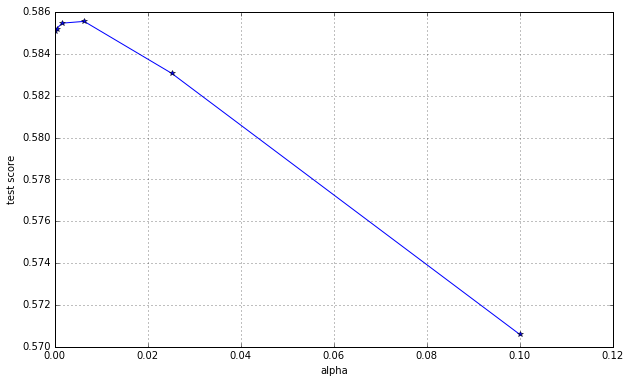

In [29]:
alphas = np.logspace(-4, -1, 6)
scores = []
regr = linear_model.Ridge()

for alpha in alphas:
    regr.set_params(alpha=alpha)
    regr.fit(diabetes_X_train, diabetes_y_train)
    s = regr.score(diabetes_X_test, diabetes_y_test) 
    print alpha, s
    scores.append(s) 

plt.plot(alphas, scores,'*-')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('test score')

## Sparsity - LASSO 

- Select only informative features. Set non-informative features to 0
- Model:
$$ y = X \beta + \alpha \|\beta\|_1 + \epsilon$$

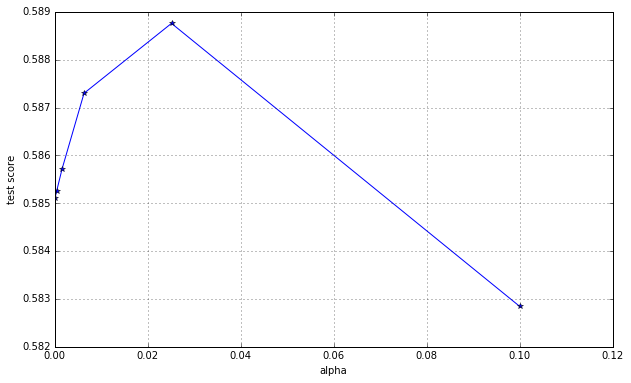

In [30]:
alphas = np.logspace(-4, -1, 6)

regr = linear_model.Lasso()

scores = [regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) \
          for alpha in alphas]

plt.plot(alphas, scores,'*-')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('test score')

Computing regularization path using the LARS ...
.

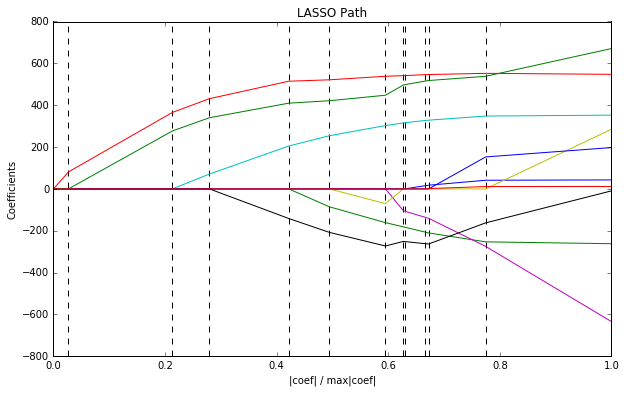

In [31]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(diabetes_X_train, diabetes_y_train, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

## Iris flower dataset
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [43]:
# import Iris dataset
iris = datasets.load_iris()

In [44]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [46]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
                            iris.data, iris.target, test_size=0.3, random_state=0)

In [48]:
print X_train.shape
print X_test.shape

(105, 4)
(45, 4)


In [49]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [50]:
logistic.score(X_test, y_test)

0.97777777777777775

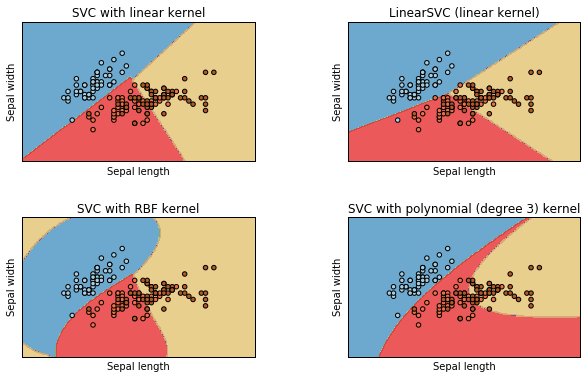

In [51]:
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Load MNIST dataset

In [52]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
FLAGS = None

In [53]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [77]:
np.argmax(mnist.train.labels,axis=1)

array([2, 4, 7, ..., 0, 2, 4])

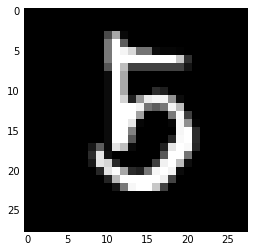

In [81]:
plt.imshow(mnist.train.images[100,].reshape(28,28))

In [83]:
print(mnist.train.images.shape, mnist.test.images.shape)

((55000, 784), (10000, 784))


## Logistic regression on MNIST data

In [84]:
lr = linear_model.LogisticRegression()
lr.fit(mnist.train.images, np.argmax(mnist.train.labels,axis=1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [85]:
lr.score(mnist.test.images, np.argmax(mnist.test.labels,axis=1))

0.91969999999999996

## Tensor flow

https://www.tensorflow.org/versions/r0.11/tutorials/mnist/beginners/index.html

## Train a softmax regression model

## Specify the model

In [89]:
# start a session making connections to TF C++ backend
sess = tf.InteractiveSession()

Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7fb1504a3150>> ignored


In [90]:
# placeholder for the input images and target output classes
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [93]:
# define weights W and biases b for our model 
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# initialize the variables
sess.run(tf.initialize_all_variables())

In [94]:
# model prediction, will apply softmax activation activation to y to derive the prob of each class
y = tf.matmul(x,W) + b

In [95]:
# Loss function based on cross entropy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

## Train the model

In [96]:
# Gradient descent, with a step length of 0.5, to descend the cross entropy.
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [97]:
# Use training data to run gradient step
for i in range(1000):
  batch = mnist.train.next_batch(100)  # mini-batch size = 100
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

##Evaluate the model

In [98]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))  # check if labels are the same
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  # perc of correct predictions
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9158


## Build a Convolutional Neual Net (CNN)

In [99]:
# Weight and Bias Initialization 
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [100]:
# convolution and pooling operations, specify strides and padding
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

## First Convolutional Layer

In [102]:
# compute 32 features for each 5x5 patch
# the input shape: [patch size x, patch size y, num of input channel, num of ouput channels]
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [103]:
# To apply the layer, we first reshape x to a 4d tensor
# [sample size, image width, image height, num of color channels]
x_image = tf.reshape(x, [-1,28,28,1])

# then apply convoluation and max pooling
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [110]:
# check the output shapes
print('convolution layer output shape: ', h_conv1.get_shape())
print('max pooling layer output shape: ', h_pool1.get_shape())

('convolution layer output shape: ', TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)]))
('max pooling layer output shape: ', TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)]))


## Second Convolutional Layer

In [111]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [113]:
print h_pool2.get_shape()

(?, 7, 7, 64)


## Densely Connected Layer

In [117]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [118]:
# Dropout to reduce overfitting
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## Readout Layer

In [120]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

## Train and Evaluate the Model

In [121]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

In [122]:
# training
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.14
step 100, training accuracy 0.88
step 200, training accuracy 0.94
step 300, training accuracy 0.94
step 400, training accuracy 0.92
step 500, training accuracy 0.98
step 600, training accuracy 0.98
step 700, training accuracy 0.92
step 800, training accuracy 0.96
step 900, training accuracy 0.96
step 1000, training accuracy 0.96
step 1100, training accuracy 1
step 1200, training accuracy 0.94
step 1300, training accuracy 0.9
step 1400, training accuracy 1
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 0.9
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 0.98
step 2100, training accuracy 1
step 2200, training accuracy 0.98
step 2300, training accuracy 0.96
step 2400, training accuracy 1
step 2500, training accuracy 0.98
step 2600, training accuracy 0.98
step 2700, training accuracy 0.98
step 2800, training accuracy 1
step 2900, training accuracy 0.98
step 3000, t

In [123]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.9927
